In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
%matplotlib inline
 
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
 
    

# sales_data = pd.read_csv('retail_sales.csv')
# sales_data['date']=pd.to_datetime(sales_data['date'])
# sales_data.set_index('date', inplace=True)
 
# sales_data.plot()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("PowerData.csv",index_col=0)
data = data.loc['1985-01-01':]

data.head()

,IPG2211A2N
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [3]:
data.index = pd.to_datetime(data.index)


In [4]:
data.columns = ['Energy Production']
data.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


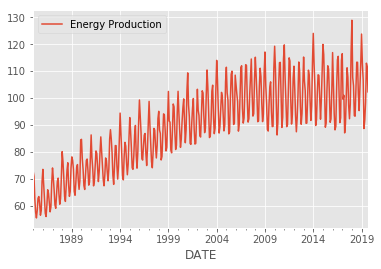

In [5]:
data.plot()

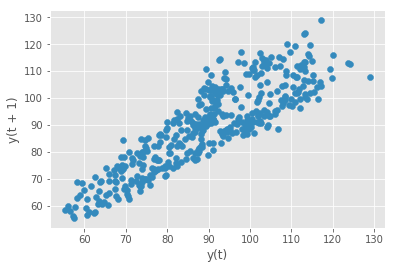

In [6]:
pd.plotting.lag_plot(data['Energy Production'])

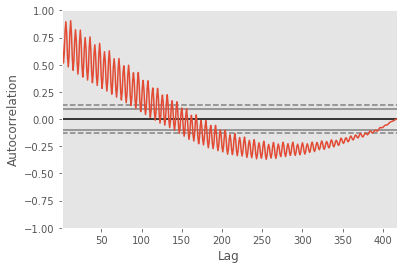

In [7]:
pd.plotting.autocorrelation_plot(data['Energy Production'])

In [8]:
data['Energy Production'].corr(data['Energy Production'].shift(12))

0.9737644443642707

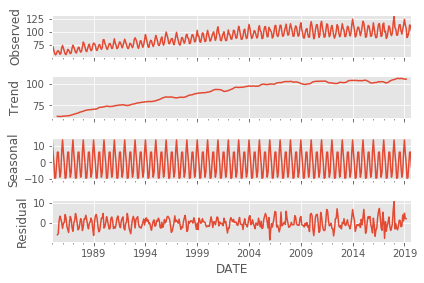

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data['Energy Production'], model='additive')
x = decomposed.plot() #See note below about this

In [10]:
dt = data.copy(deep=True)
dt['Energy Production'] = data['Energy Production'].diff()
dt['Energy Production'] = dt['Energy Production'].diff()
dt['Energy Production'] = dt['Energy Production'].diff()
dt['Energy Production'] = dt['Energy Production'].diff()

In [11]:
data.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


In [12]:
dt = dt.iloc[4:]
dt.head()

,Energy Production
DATE,
1985-05-01,-10.0074
1985-06-01,2.4811
1985-07-01,-5.2777
1985-08-01,-2.4837
1985-09-01,6.2924


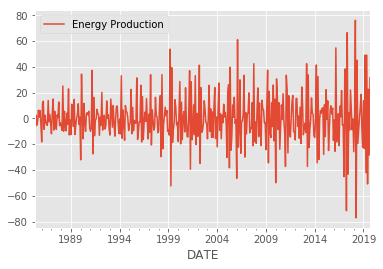

In [13]:
dt.plot()

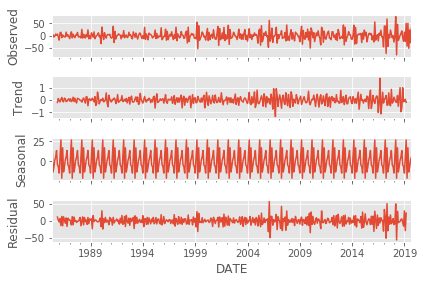

In [14]:
decomposed = seasonal_decompose(dt['Energy Production'], model='additive')
x = decomposed.plot()

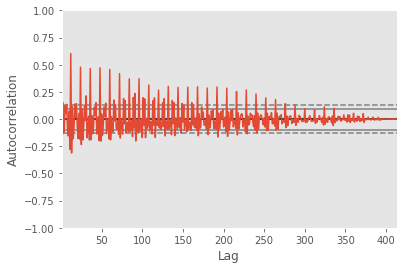

In [15]:
pd.plotting.autocorrelation_plot(dt['Energy Production'])

In [22]:
from statsmodels.tsa.arima_model import ARMA
 
#create train/test datasets
X = dt['Energy Production'].dropna()
train_data = X[:int((len(X)*70)/100)]
test_data = X[int((len(X)*70)/100):]
 
#train the autoregression model
model = ARMA(train_data, order=(0,16))
model_fitted = model.fit()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [20]:
print('The lag value chose is: %s' % model_fitted.k_ar)
 
 
print('The coefficients of the model are:\n %s' % model_fitted.params)
 


The lag value chose is: 0
The coefficients of the model are:
 const                      0.000192
ma.L1.Energy Production   -0.999968
dtype: float64


/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


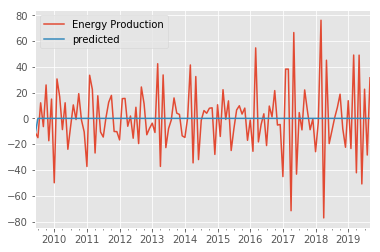

In [21]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
 
# create a comparison dataframe
compare_df = pd.concat(
    [X[int((len(X)*70)/100):],
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})
 
#plot the two values
compare_df.plot()

In [ ]:
from sklearn.metrics import r2_score
 
r2 = r2_score(X[int((len(X)*70)/100):], predictions)
r2

In [ ]:
# import math
# from sklearn.metrics import mean_squared_error


# trainPredict = scaler.inverse_transform(trainPredict)
# testPredict = scaler.inverse_transform(testPredict)

# ytrain = scaler.inverse_transform([Ytrain])
# ytest = scaler.inverse_transform([Ytest])
    
# trainScore = math.sqrt(mean_squared_error(ytrain[0], X[:int((len(X)*70)/100)]))    
# print("train Score", trainScore)

# testScore = math.sqrt(mean_squared_error(ytest[0], X[int((len(X)*70)/100):]))    
# print("train Score", testScore)
# print(ytest[0])